In [1]:
library(latex2exp)

Warning message:
"Paket 'latex2exp' wurde unter R Version 4.2.3 erstellt"


# String tension analysis

In [2]:
results <- read.csv("..\\data\\comp_energy_results.csv", header = TRUE, sep = ",")

d <- results[, c("index", "temp", "x", "comptype")]
colnames(d) <- c("index", "temp", "size", "comptype")

for (i in 1:nrow(d)) d$width[i] <- unlist(strsplit(unlist(strsplit(d$comptype[i], " "))[2], "x"))[1]

bin_size <- 8

energy <- c()
energy_err <- c()
for (index in d$index) {
	res <- read.csv(paste("..\\data\\comp_energy_stats\\energy_", index, "_stats.csv", sep = ""), header = TRUE, sep = ",")
	energy <- append(energy, res$energy[res$bin_size == bin_size])
	energy_err <- append(energy_err, res$energy_err[res$bin_size == bin_size])
}

d$energy <- energy
d$energy_err <- energy_err
d$energy_err_perc <- d$energy_err / d$energy
d$energy_scaled <- d$energy / d$size #/ d$size / d$size
d$energy_scaled_err <- d$energy_scaled * d$energy_err_perc

d <- d[order(d$temp), ]

d$width <- as.integer(d$width)
wilson <- na.omit(d)
free <- d[is.na(d$width), ]
free <- free[, !names(free) %in% c("width")]
wilson <- wilson[order(wilson$width),]

for (i in 1:nrow(wilson)) {
	size <- wilson$size[i]
	temp <- wilson$temp[i]
	wilson$energy[i] <- wilson$energy[i] - free$energy[free$size == size & free$temp == temp]
	wilson$energy_scaled[i] <- wilson$energy_scaled[i] - free$energy_scaled[free$size == size & free$temp == temp]
}
wilson$width_perc <- wilson$width / wilson$size

wilson
free

Warning message in eval(expr, envir, enclos):
"NAs durch Umwandlung erzeugt"


,index,temp,size,comptype,width,energy,energy_err,energy_err_perc,energy_scaled,energy_scaled_err,width_perc
,<int>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61,5467,0.25,16,2 1x16 Wilson Metropolis Simulations,1,2.046400,0.03764837,5.507139e-05,0.1279000,0.002353023,0.06250000
73,5509,0.25,36,1 1x36 Wilson Metropolis Simulations,1,4.599334,0.20332750,2.620266e-05,0.1277593,0.005647986,0.02777778
105,5577,0.25,54,1 1x54 Wilson Metropolis Simulations,1,6.925066,0.33912269,1.295371e-05,0.1282420,0.006280050,0.01851852
132,6057,0.20,16,1 2x16 Wilson Metropolis Simulations,2,4.028574,0.05939869,8.651598e-05,0.2517858,0.003712418,0.12500000
134,6061,0.21,16,1 2x16 Wilson Metropolis Simulations,2,4.375606,0.06483622,9.440860e-05,0.2734754,0.004052264,0.12500000
136,6065,0.22,16,1 2x16 Wilson Metropolis Simulations,2,4.427251,0.05859397,8.532184e-05,0.2767032,0.003662123,0.12500000
138,6069,0.23,16,1 2x16 Wilson Metropolis Simulations,2,4.578752,0.06293568,9.161225e-05,0.2861720,0.003933480,0.12500000
140,6073,0.24,16,1 2x16 Wilson Metropolis Simulations,2,4.946871,0.06288872,9.153608e-05,0.3091795,0.003930545,0.12500000
62,5468,0.25,16,3 2x16 Wilson Metropolis Simulations,2,5.098134,0.04767085,6.942220e-05,0.3186333,0.002979428,0.12500000


,index,temp,size,comptype,energy,energy_err,energy_err_perc,energy_scaled,energy_scaled_err
,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5367,0.20,16,4 Metropolis Simulations,682.5347,0.10025588,1.468876e-04,42.65842,0.006265993
31,5427,0.20,36,3 Metropolis Simulations,7775.3147,0.29713395,3.821504e-05,215.98096,0.008253721
153,6100,0.20,24,1 Metropolis Simulations,2303.6129,0.24037028,1.043449e-04,95.98387,0.010015428
211,6180,0.20,54,1 Metropolis Simulations,26239.4959,0.86646068,3.302124e-05,485.91659,0.016045568
3,5369,0.21,16,4 Metropolis Simulations,682.3862,0.08178697,1.198544e-04,42.64914,0.005111685
33,5429,0.21,36,3 Metropolis Simulations,7774.2121,0.37710586,4.850728e-05,215.95033,0.010475163
157,6104,0.21,24,1 Metropolis Simulations,2303.5277,0.25320934,1.099224e-04,95.98032,0.010550389
215,6184,0.21,54,1 Metropolis Simulations,26236.2646,0.81331343,3.099959e-05,485.85675,0.015061360
5,5371,0.22,16,4 Metropolis Simulations,682.3133,0.06682199,9.793446e-05,42.64458,0.004176374


## Energy of the free theory

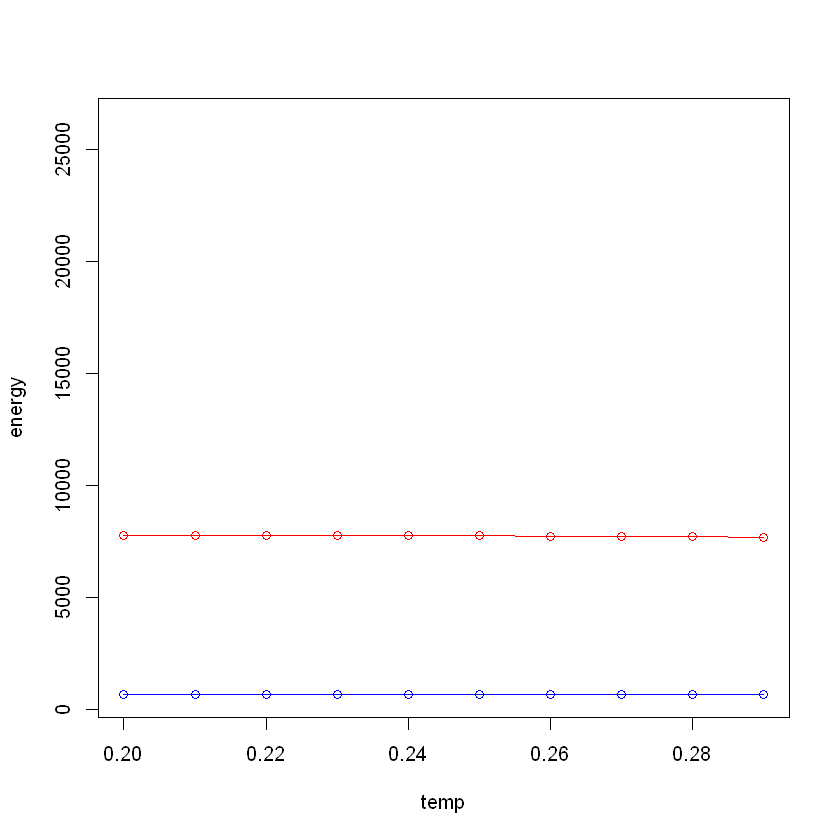

In [3]:
entries <- data.frame(list(
	size = c(16, 36),
	col = c("blue", "red")
))

d <- free

plot(NULL, xlim = c(min(d$temp), max(d$temp)),
	ylim = c(min(d$energy), max(d$energy)),
	xlab = "temp", ylab = "energy")
for (i in 1:nrow(entries)) {
	size <- entries$size[i]
	col <- entries$col[i]
	x <- d$temp[d$size == size]
	y <- d$energy[d$size == size]

	lines(x, y, col = col)
	points(x, y, col = col)
}

## String energy

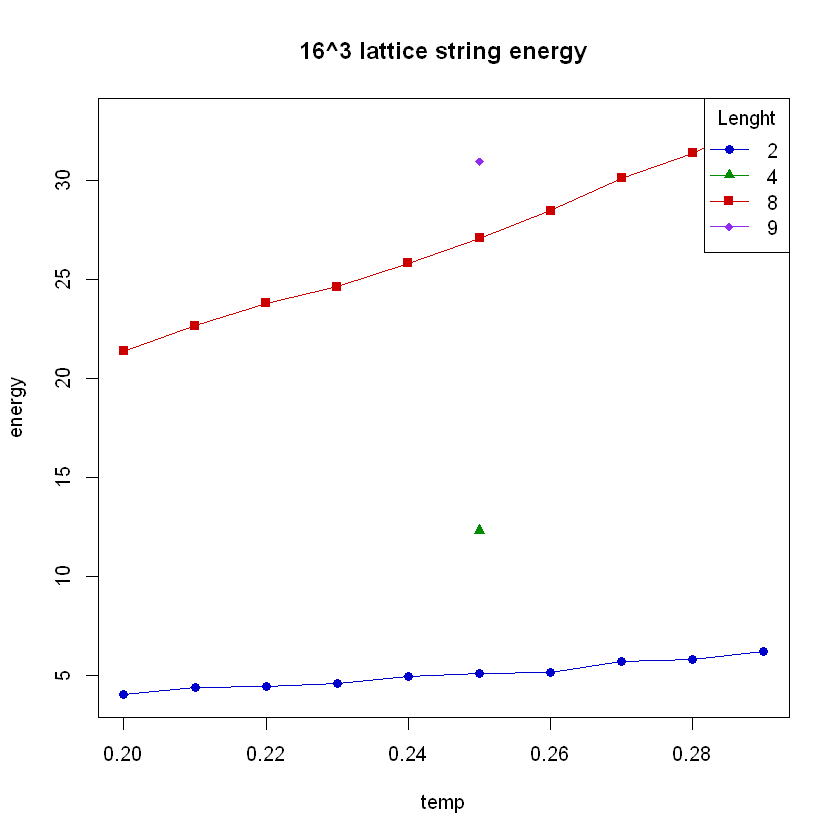

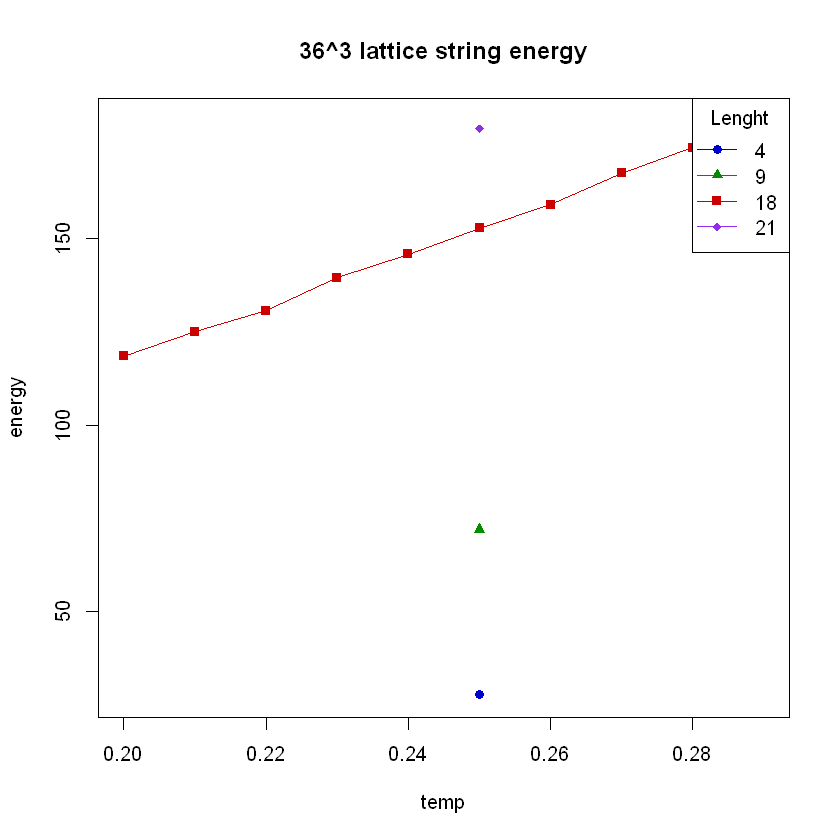

In [4]:
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)
ltys <- c(1, 1, 1, 1)

for (size in c(16, 36)) {
	d <- wilson[wilson$size == size & wilson$width %in% c(floor(size / 8), floor(size / 4), floor(size / 2), floor(size * 3 / 5)), ]

	plot(NULL, xlim = c(min(d$temp), max(d$temp)),
		ylim = c(min(d$energy), max(d$energy)),
		xlab = "temp", ylab = "energy")
	title(paste(size, "^3 lattice string energy", sep = ""))

	widths <- c()
	legend_cols <- c()
	legend_ltys <- c()
	legend_pchs <- c()
	for (i in 1:length(unique(d$width))) {
		width <- unique(d$width)[i]
		widths <- append(widths, width)
		lty <- ltys[i]
		legend_ltys <- append(legend_ltys, lty)
		col <- cols[i]
		legend_cols <- append(legend_cols, col)
		pch <- pchs[i]
		legend_pchs <- append(legend_pchs, pch)
		x <- d$temp[d$width == width]
		y <- d$energy[d$width == width]

		lines(x, y, col = col, lty = lty)
		points(x, y, col = col, pch = pch)
	}
	legend("topright", legend = widths, col = legend_cols, title = "Lenght", lty = legend_ltys, pch = legend_pchs)
}

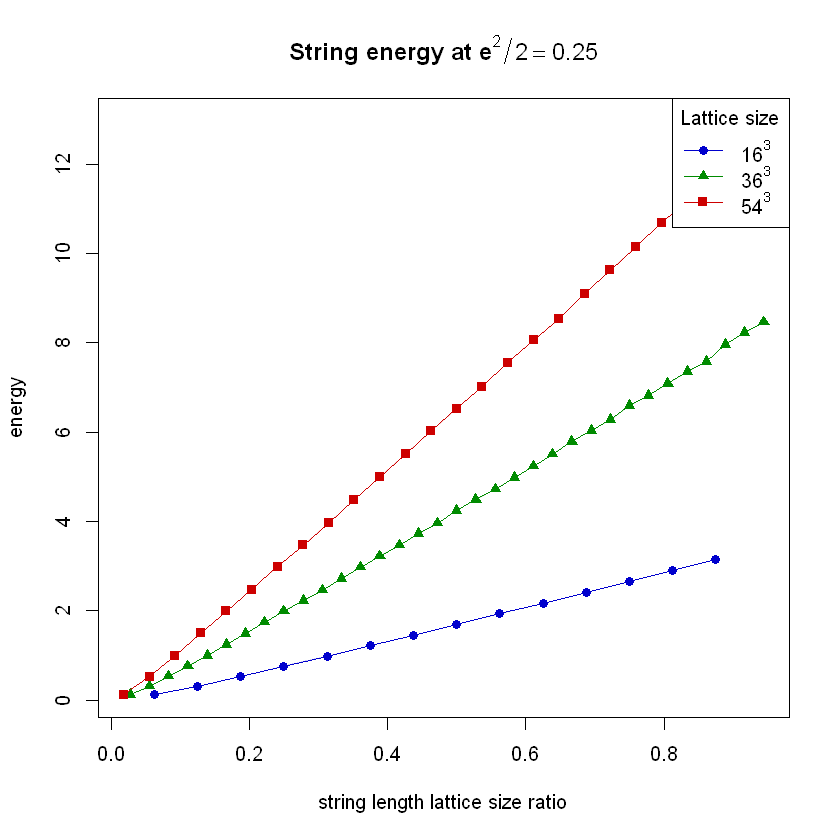

In [5]:
cols <- c("blue3", "green4", "red3", "purple2")
pchs <- c(16, 17, 15, 18)
ltys <- c(1, 1, 1, 1)
sizes <- c(16, 36, 54)

for (temp in c(0.25)) {
	d <- wilson[wilson$temp == temp, ]

	plot(NULL, xlim = c(min(d$width_perc), max(d$width_perc)),
		ylim = c(min(d$energy_scaled), max(d$energy_scaled)),
		xlab = "string length lattice size ratio", ylab = "energy")
	title(TeX(paste("String energy at $e^2 / 2 = ", temp, "$", sep = ""), bold = TRUE))

	legend_cols <- c()
	legend_ltys <- c()
	legend_pchs <- c()
	for (i in 1:length(sizes)) {
		size <- sizes[i]
		lty <- ltys[i]
		legend_ltys <- append(legend_ltys, lty)
		col <- cols[i]
		legend_cols <- append(legend_cols, col)
		pch <- pchs[i]
		legend_pchs <- append(legend_pchs, pch)
		x <- d$width_perc[d$size == size]
		y <- d$energy_scaled[d$size == size]
		y_err <- d$energy_scaled_err[d$size == size]

		polygon(append(x, rev(x)), append(y + y_err, rev(y - y_err)), col = adjustcolor(col, alpha.f = 0.2), lty = 0)
		lines(x, y, col = col, lty = lty)
		points(x, y, col = col, pch = pch)
	}
	legend("topright", legend = TeX(paste("$", sizes, "^3$", sep = "")), col = cols, lty = c(1, 1, 1, 1), pch = pchs, title = "Lattice size")
}

# String tension

In [12]:
d <- read.csv("..\\data\\string_tension_results.csv", header = TRUE, sep = ",")
d <- d[d$bin_size == bin_size, ]
d <- d[order(d$temp), ]

d16 <- d[d$size == 54, ]
d16

,index,temp,size,bin_size,string_tension
,<int>,<dbl>,<int>,<int>,<dbl>
190,6177,0.20,54,8,6.080126
196,6181,0.21,54,8,6.350467
202,6185,0.22,54,8,6.808226
208,6189,0.23,54,8,7.100390
214,6193,0.24,54,8,7.443486
124,5577,0.25,54,8,13.933697
220,6201,0.26,54,8,8.182666
226,6205,0.27,54,8,8.545953
232,6209,0.28,54,8,8.939918
